$$
\newcommand{\mat}[1]{\boldsymbol {#1}}
\newcommand{\mattr}[1]{\boldsymbol {#1}^\top}
\newcommand{\matinv}[1]{\boldsymbol {#1}^{-1}}
\newcommand{\vec}[1]{\boldsymbol {#1}}
\newcommand{\vectr}[1]{\boldsymbol {#1}^\top}
\newcommand{\rvar}[1]{\mathrm {#1}}
\newcommand{\rvec}[1]{\boldsymbol{\mathrm{#1}}}
\newcommand{\diag}{\mathop{\mathrm {diag}}}
\newcommand{\set}[1]{\mathbb {#1}}
\newcommand{\norm}[1]{\left\lVert#1\right\rVert}
\newcommand{\pderiv}[2]{\frac{\partial #1}{\partial #2}}
\newcommand{\bb}[1]{\boldsymbol{#1}}
$$
# Course Project - Variance Networks
<a id=part3></a>

This project uses the idea of Variance Layers, as proposed in [Variance Networks: When Expectation Does Not Meet Your Expectations](https://arxiv.org/abs/1803.03764), and extends it to a variation of discrete distributions. We explore the discretized distributions formed from the normal and uniform distributions, rounded to the nearest fraction, corresponding to different values.
Our Rounded-Variance layers' variance is trained, in a zero mean distribution which takes a discrete set of values as defined by the rounding number. 

We will perform 8 experiments, using variantions of LeNet5, with one of the FC/Conv layers changed to a RoundedVarianceFC/Conv layer, testing both discretized uniform and normal distributions. These will be trained and tested on MNIST and CIFAR10.

In [1]:
import os
import re
import sys
import glob
import numpy as np
import matplotlib.pyplot as plt
import unittest
import torch
import torchvision
import torchvision.transforms as tvtf

%matplotlib inline
%load_ext autoreload
%autoreload 2

seed = 42
device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')

plt.rcParams.update({'font.size': 12})
test = unittest.TestCase()
import hw2.experiments as experiments
from hw2.experiments import load_experiment
from cs236605.plot import plot_fit

Experimenting with a LinearVariance rounded layer


In [17]:


# Test experiment1 implementation on a few data samples and with a small model
experiments.run_experiment('test_run', seed=seed, bs_train=50, batches=10, epochs=15, early_stopping=8,
                           filters_per_layer=[32], layers_per_block=1, pool_every=1, hidden_dims=[100],ycn ="LeNet5ConvVarianceUnif" ,dataset="MNIST",rounding=0)

# There should now be a file 'test_run.json' in your `results/` folder.
# We can use it to load the results of the experiment.
cfg, fit_res = load_experiment('results/test_run.json')
_, _ = plot_fit(fit_res)

# And `cfg` contains the exact parameters to reproduce it
print('experiment config: ', cfg)

LeNet5ConvVarianceUnif(
  (feature_extractor): Sequential(
    (0): ConvVarianceUnif(1, 20, kernel_size=(5, 5), stride=1, padding=0, dilation=1, bias=False)
    (1): BatchNorm2d(20, eps=1e-05, momentum=0.1, affine=False, track_running_stats=True)
    (2): ReLU()
    (3): MaxPool2d(kernel_size=(2, 2), stride=(2, 2), padding=0, dilation=1, ceil_mode=False)
    (4): Conv2d(20, 50, kernel_size=(5, 5), stride=(1, 1), bias=False)
    (5): BatchNorm2d(50, eps=1e-05, momentum=0.1, affine=False, track_running_stats=True)
    (6): ReLU()
    (7): MaxPool2d(kernel_size=(2, 2), stride=(2, 2), padding=0, dilation=1, ceil_mode=False)
  )
  (classifier): Sequential(
    (0): Linear(in_features=800, out_features=500, bias=True)
    (1): BatchNorm1d(500, eps=1e-05, momentum=0.1, affine=False, track_running_stats=True)
    (2): ReLU()
    (3): Linear(in_features=500, out_features=10, bias=True)
  )
)
--- EPOCH 1/15 ---
train_batch (0.154):  47%|████▋     | 566/1200 [00:32<00:36, 17.56it/s]


KeyboardInterrupt: 

We'll use the following function to load multiple experiment results and plot them together.

In [2]:
def plot_exp_results(filename_pattern, results_dir='results'):
    fig = None
    result_files = glob.glob(os.path.join(results_dir, filename_pattern))
    result_files.sort()
    if len(result_files) == 0:
        print(f'No results found for pattern {filename_pattern}.', file=sys.stderr)
        return
    for filepath in result_files:
        print(filepath)
        m = re.match('exp\d_(\d_)?(.*)\.json', os.path.basename(filepath))
        cfg, fit_res = load_experiment(filepath)
        fig, axes = plot_fit(fit_res, fig, legend=m[2],log_loss=True)
    del cfg['filters_per_layer']
    del cfg['layers_per_block']
    print('common config: ', cfg)

#### Experiments : Varied LeNet5 Architectures with a LinearVariance Rounded layers

We'll see the comparison between a normally distributed layer, to discretised normal layers where a layer takes values tuned to 1/R. We expect that as $R \to \infty$ the distributions will go to normal.

**Configuratons**:


results/exp1_MNIST_NORM_CONVVAR_R0.json
results/exp1_MNIST_NORM_CONVVAR_R1.json
results/exp1_MNIST_NORM_CONVVAR_R100.json
results/exp1_MNIST_NORM_CONVVAR_R1000.json
results/exp1_MNIST_NORM_CONVVAR_R2.json
common config:  {'run_name': 'exp1_MNIST_NORM_CONVVAR_R2', 'out_dir': './results', 'seed': 1811189179, 'bs_train': 128, 'bs_test': 32, 'batches': 100, 'epochs': 100, 'early_stopping': 5, 'checkpoints': None, 'lr': 0.0015, 'reg': 0.0002, 'pool_every': 0, 'hidden_dims': 0, 'ycn': 'LeNet5ConvVariance', 'dataset': 'MNIST', 'kw': {'rounding': 2}}


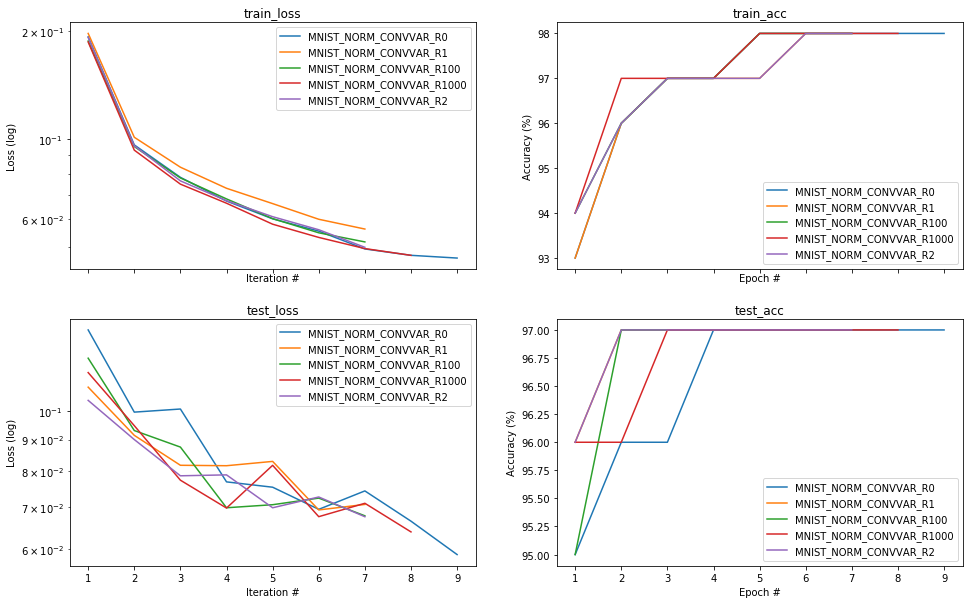

In [3]:
plot_exp_results('exp1*.json')

Further questions: Is this layer just a trained dropout+linear layer?

results/exp2_MNIST_UNIF_CONVVAR_R0.json
results/exp2_MNIST_UNIF_CONVVAR_R1.json
results/exp2_MNIST_UNIF_CONVVAR_R100.json
results/exp2_MNIST_UNIF_CONVVAR_R1000.json
results/exp2_MNIST_UNIF_CONVVAR_R2.json
common config:  {'run_name': 'exp2_MNIST_UNIF_CONVVAR_R2', 'out_dir': './results', 'seed': 1679268856, 'bs_train': 128, 'bs_test': 32, 'batches': 100, 'epochs': 100, 'early_stopping': 5, 'checkpoints': None, 'lr': 0.0015, 'reg': 0.0002, 'pool_every': 0, 'hidden_dims': 0, 'ycn': 'LeNet5ConvVarianceUnif', 'dataset': 'MNIST', 'kw': {'rounding': 2}}


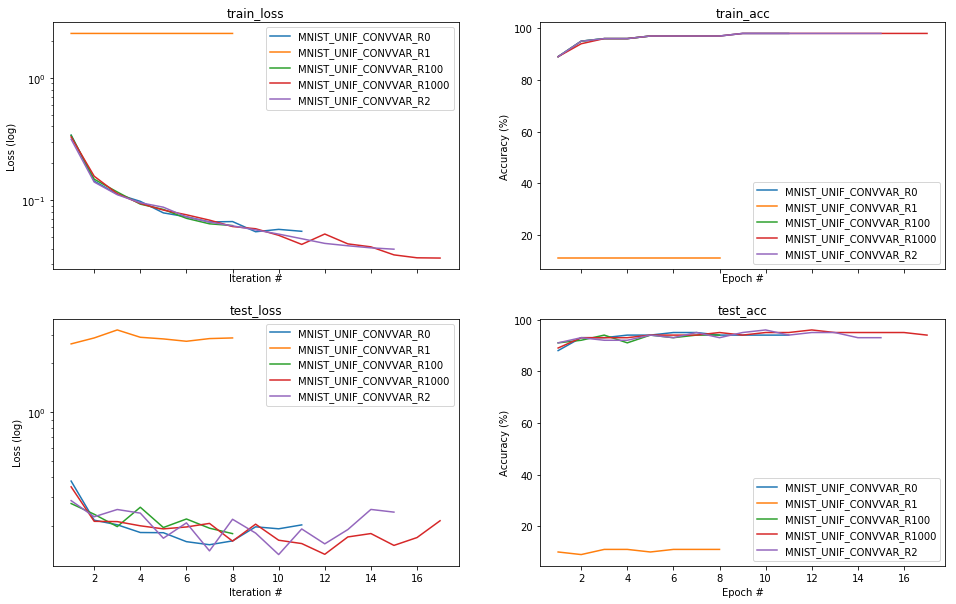

In [4]:
plot_exp_results('exp2*.json')

results/exp3_MNIST_NORM_LINEARVAR_R1.json
results/exp3_MNIST_NORM_LINEARVAR_R100.json
results/exp3_MNIST_NORM_LINEARVAR_R1000.json
results/exp3_MNIST_NORM_LINEARVAR_R2.json
common config:  {'run_name': 'exp3_MNIST_NORM_LINEARVAR_R2', 'out_dir': './results', 'seed': 1662893862, 'bs_train': 128, 'bs_test': 32, 'batches': 100, 'epochs': 100, 'early_stopping': 5, 'checkpoints': None, 'lr': 0.0015, 'reg': 0.0002, 'pool_every': 0, 'hidden_dims': 0, 'ycn': 'LeNet5FCVariance', 'dataset': 'MNIST', 'kw': {'rounding': 2}}


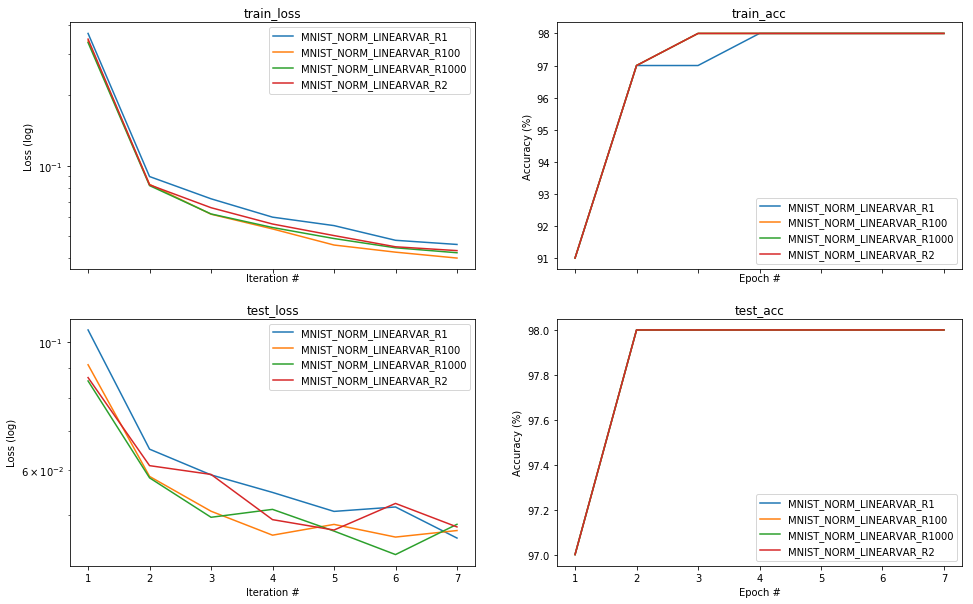

In [5]:
plot_exp_results('exp3*.json')

results/exp4_MNIST_UNIF_LINEARVAR_R0.json
results/exp4_MNIST_UNIF_LINEARVAR_R1.json
results/exp4_MNIST_UNIF_LINEARVAR_R100.json
results/exp4_MNIST_UNIF_LINEARVAR_R1000.json
results/exp4_MNIST_UNIF_LINEARVAR_R2.json
common config:  {'run_name': 'exp4_MNIST_UNIF_LINEARVAR_R2', 'out_dir': './results', 'seed': 595363926, 'bs_train': 128, 'bs_test': 32, 'batches': 100, 'epochs': 100, 'early_stopping': 5, 'checkpoints': None, 'lr': 0.0015, 'reg': 0.0002, 'pool_every': 0, 'hidden_dims': 0, 'ycn': 'LeNet5FCVarianceUnif', 'dataset': 'MNIST', 'kw': {'rounding': 2}}


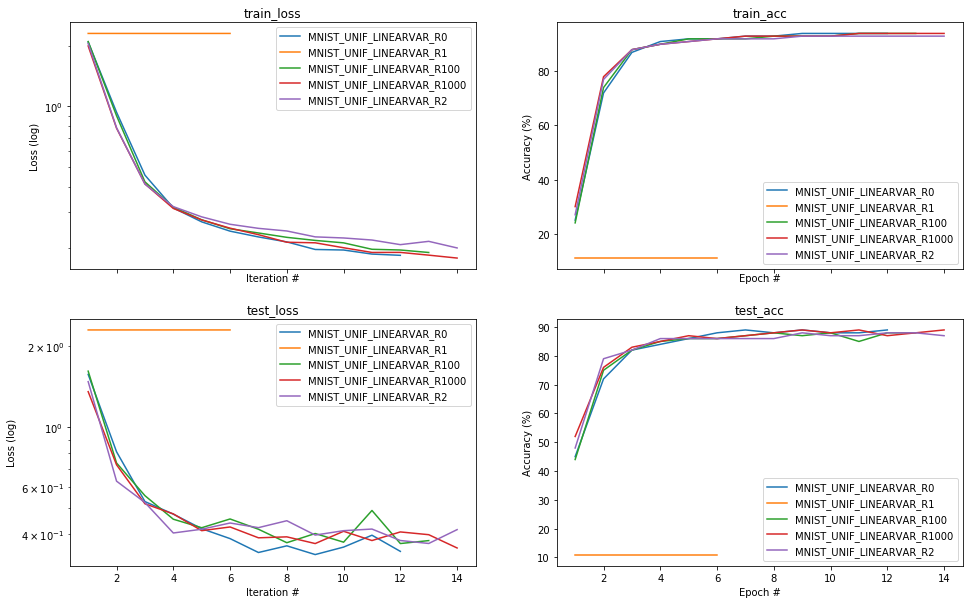

In [6]:
plot_exp_results('exp4*.json')

results/exp5_CIFAR10_NORM_CONVVAR_R0.json
results/exp5_CIFAR10_NORM_CONVVAR_R1.json
results/exp5_CIFAR10_NORM_CONVVAR_R100.json
results/exp5_CIFAR10_NORM_CONVVAR_R1000.json
results/exp5_CIFAR10_NORM_CONVVAR_R2.json
common config:  {'run_name': 'exp5_CIFAR10_NORM_CONVVAR_R2', 'out_dir': './results', 'seed': 1403408015, 'bs_train': 128, 'bs_test': 32, 'batches': 100, 'epochs': 100, 'early_stopping': 5, 'checkpoints': None, 'lr': 0.0015, 'reg': 0.0002, 'pool_every': 0, 'hidden_dims': 0, 'ycn': 'LeNet5ConvVariance', 'dataset': 'CIFAR10', 'kw': {'rounding': 2}}


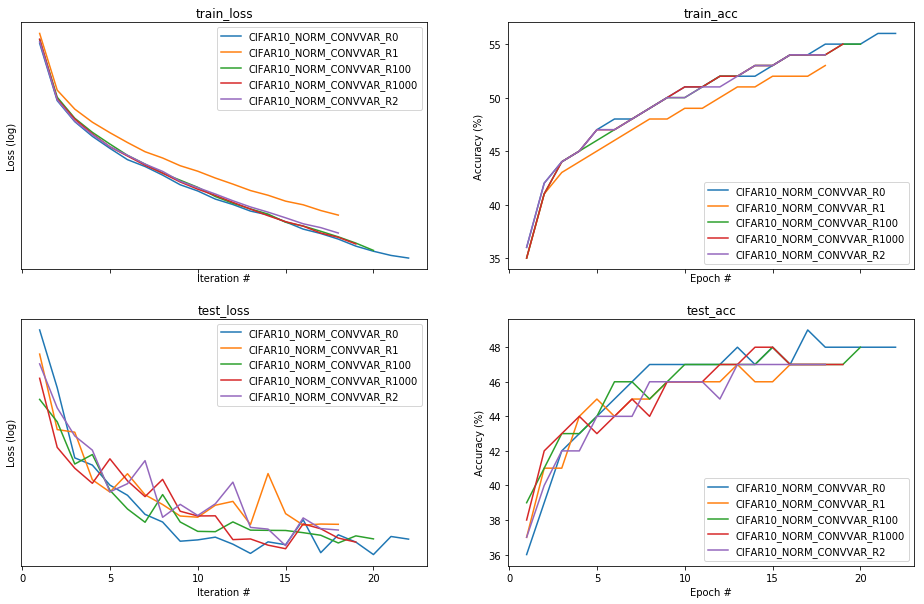

In [7]:
plot_exp_results('exp5*.json')

results/exp6_CIFAR10_UNIF_CONVVAR_R0.json
results/exp6_CIFAR10_UNIF_CONVVAR_R1.json
results/exp6_CIFAR10_UNIF_CONVVAR_R100.json
results/exp6_CIFAR10_UNIF_CONVVAR_R1000.json
results/exp6_CIFAR10_UNIF_CONVVAR_R2.json
common config:  {'run_name': 'exp6_CIFAR10_UNIF_CONVVAR_R2', 'out_dir': './results', 'seed': 448977134, 'bs_train': 128, 'bs_test': 32, 'batches': 100, 'epochs': 100, 'early_stopping': 5, 'checkpoints': None, 'lr': 0.0015, 'reg': 0.0002, 'pool_every': 0, 'hidden_dims': 0, 'ycn': 'LeNet5ConvVarianceUnif', 'dataset': 'CIFAR10', 'kw': {'rounding': 2}}


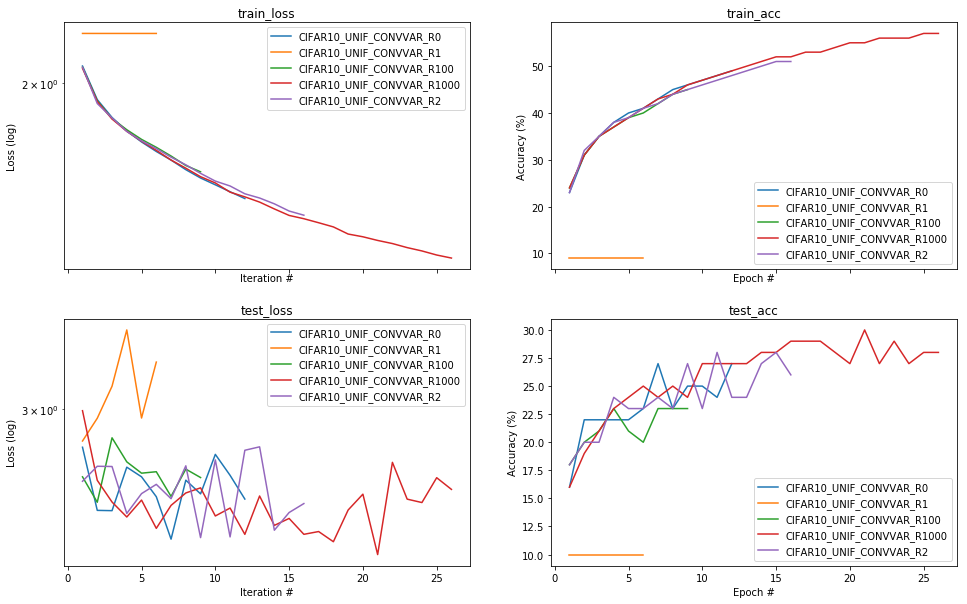

In [8]:
plot_exp_results('exp6*.json')

results/exp7_CIFAR10_NORM_LINEARVAR_R0.json
results/exp7_CIFAR10_NORM_LINEARVAR_R1.json
results/exp7_CIFAR10_NORM_LINEARVAR_R100.json
results/exp7_CIFAR10_NORM_LINEARVAR_R1000.json
results/exp7_CIFAR10_NORM_LINEARVAR_R2.json
common config:  {'run_name': 'exp7_CIFAR10_NORM_LINEARVAR_R2', 'out_dir': './results', 'seed': 1964054517, 'bs_train': 128, 'bs_test': 32, 'batches': 100, 'epochs': 100, 'early_stopping': 5, 'checkpoints': None, 'lr': 0.0015, 'reg': 0.0002, 'pool_every': 0, 'hidden_dims': 0, 'ycn': 'LeNet5FCVariance', 'dataset': 'CIFAR10', 'kw': {'rounding': 2}}


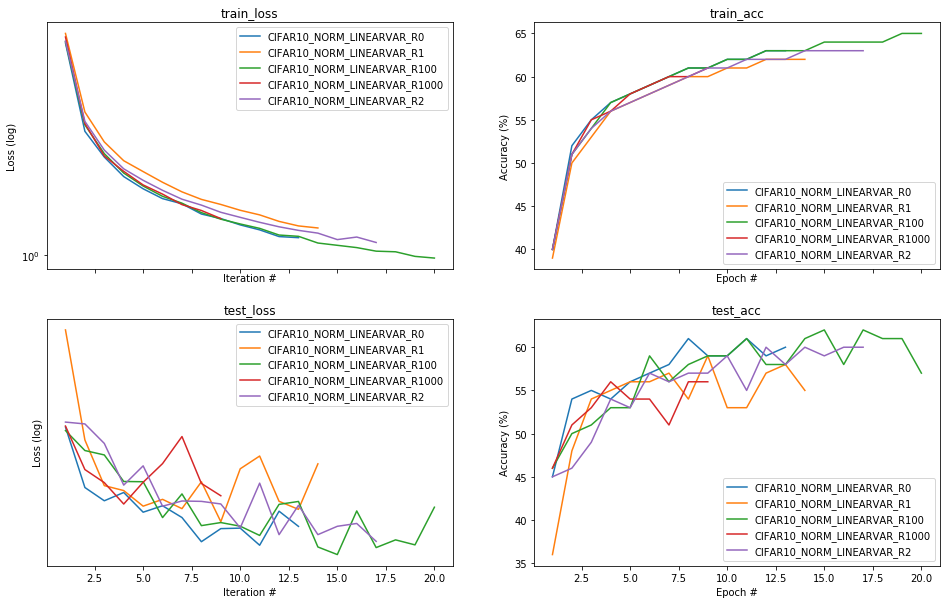

In [9]:
plot_exp_results('exp7*.json')

results/exp8_CIFAR10_UNIF_LINEARVAR_R0.json
results/exp8_CIFAR10_UNIF_LINEARVAR_R1.json
results/exp8_CIFAR10_UNIF_LINEARVAR_R100.json
results/exp8_CIFAR10_UNIF_LINEARVAR_R1000.json
results/exp8_CIFAR10_UNIF_LINEARVAR_R2.json
common config:  {'run_name': 'exp8_CIFAR10_UNIF_LINEARVAR_R2', 'out_dir': './results', 'seed': 82328646, 'bs_train': 128, 'bs_test': 32, 'batches': 100, 'epochs': 100, 'early_stopping': 5, 'checkpoints': None, 'lr': 0.0015, 'reg': 0.0002, 'pool_every': 0, 'hidden_dims': 0, 'ycn': 'LeNet5FCVarianceUnif', 'dataset': 'CIFAR10', 'kw': {'rounding': 2}}


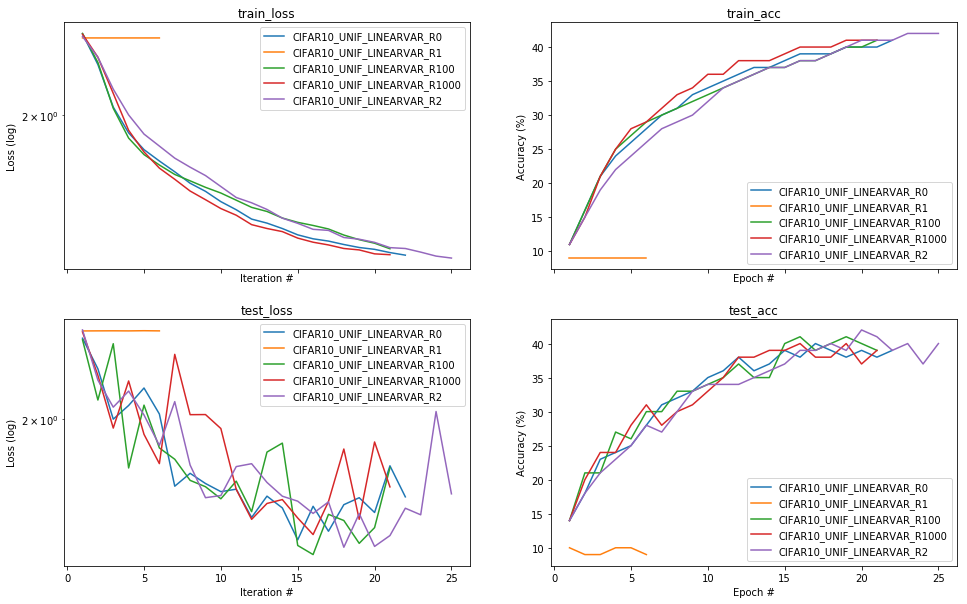

In [10]:
plot_exp_results('exp8*.json')